In [49]:
import sqlite3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [50]:
conn = sqlite3.connect("../db.sqlite3")

restaurant_order = pd.read_sql_query("SELECT * FROM restaurant_order", conn)
restaurant_orderitem = pd.read_sql_query("SELECT * FROM restaurant_orderitem", conn)
restaurant_product = pd.read_sql_query("SELECT * FROM restaurant_product", conn)
conn.close()

merged_df = restaurant_order.merge(restaurant_orderitem, left_on="id", right_on="order_id")
merged_df = merged_df.merge(restaurant_product, left_on="product_id", right_on="id")
merged_df.drop(["id_x", "id_y", "order_id", "product_id", "id"], axis=1, inplace=True)
merged_df.to_csv("combined_data.csv", index=False)
df = pd.read_csv("combined_data.csv")
df

,datetime,quantity,price,name
0,2019-08-03 20:25:00,2,0.80,Plain Papadum
1,2019-08-03 20:25:00,1,12.95,King Prawn Balti
2,2019-08-03 20:25:00,1,2.95,Garlic Naan
3,2019-08-03 20:25:00,1,3.95,Mushroom Rice
4,2019-08-03 20:25:00,1,8.95,Paneer Tikka Masala
...,...,...,...,...
74813,2017-02-23 18:20:00,1,12.95,Lamb Shashlick Curry
74814,2016-10-23 16:03:00,3,12.95,Tandoori King Prawn Garlic
74815,2018-12-24 13:22:00,2,17.95,House Red wine 75cl
74816,2017-08-31 12:20:00,2,17.95,House white wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

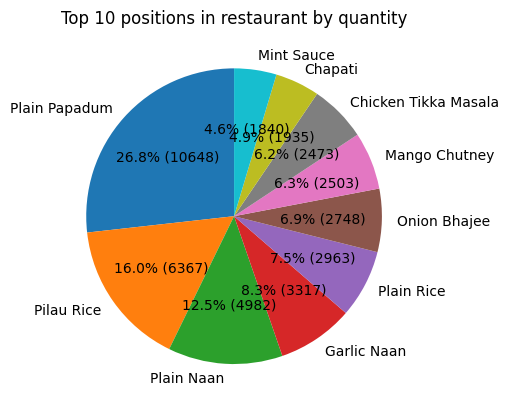

In [97]:
def format_autopct(pct, all_values):
    absolute = int(pct/100.*sum(all_values))
    return f"{pct:.1f}% ({absolute:d})"

product_sales = df.groupby("name")["quantity"].sum()
top_10 = product_sales.sort_values(ascending=False).head(10)
labels = top_10.index.values
values = top_10.values

plt.pie(values, labels=labels, autopct=lambda pct: format_autopct(pct, values), startangle=90)
plt.title("Top 10 positions in restaurant by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

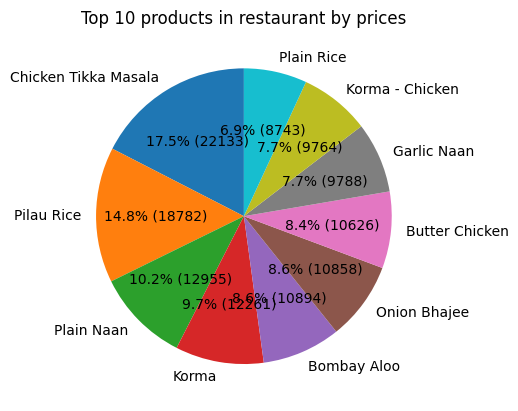

In [98]:
df["product_price"] = df["quantity"] * df["price"]

product_prices = df.groupby("name")["product_price"].sum()
top_10_prices = product_prices.sort_values(ascending=False).head(10)
price_labels = top_10_prices.index.values
values2 = top_10_prices.values

plt.pie(top_10_prices, labels=price_labels, autopct=lambda pct: format_autopct(pct, values2), startangle=90)
plt.title("Top 10 products in restaurant by prices")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

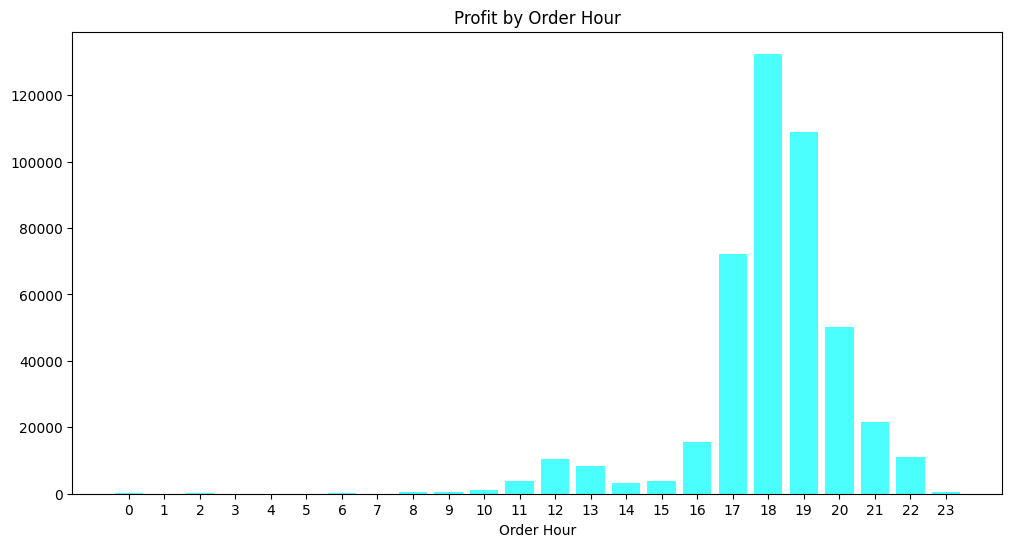

In [136]:
df["order_hour"] = df["datetime"].astype("datetime64[ns]").dt.hour
income_by_hour = df.groupby("order_hour")["product_price"].sum()

plt.figure(figsize=(12, 6)),
plt.bar(income_by_hour.index, income_by_hour.values, alpha=0.7, color="aqua")
plt.xlabel("Order Hour")
plt.title("Profit by Order Hour")
plt.xticks(range(0, 24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

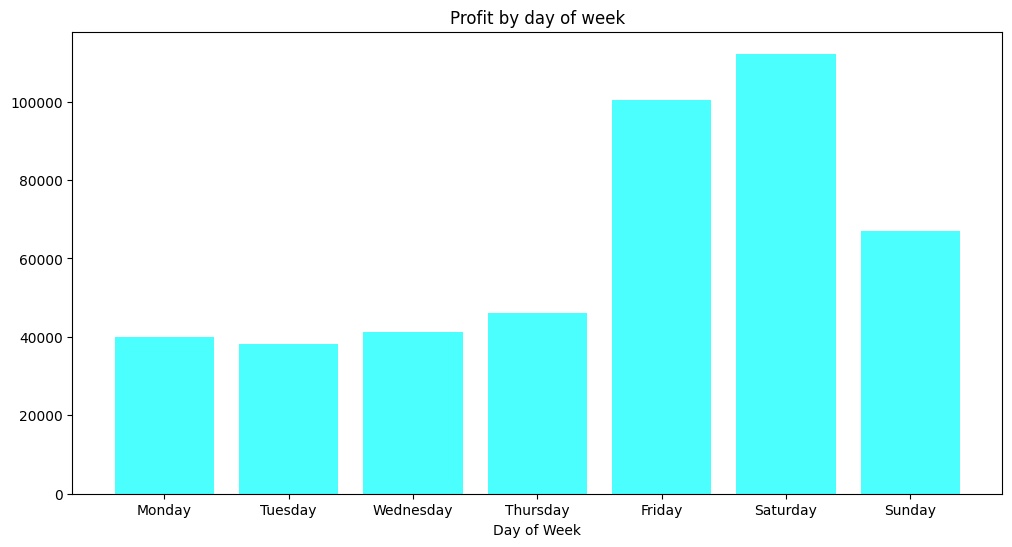

In [140]:
df["day_of_week"] = df["datetime"].astype("datetime64[ns]").dt.day_name()
daily_income = df.groupby("day_of_week")["product_price"].sum()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_income = daily_income.reindex(day_order)

plt.figure(figsize=(12, 6)),
plt.bar(daily_income.index, daily_income.values, alpha=0.7, color="aqua")
plt.xlabel("Day of Week")
plt.title("Profit by day of week")
plt.show()